<a href="https://colab.research.google.com/github/nakata5321/-_firstLevel/blob/master/lab5/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных

In [0]:
pip install web3==4.2.1

In [0]:
from web3 import Web3 

In [0]:
web3 = Web3(Web3.HTTPProvider("https://mainnet.infura.io/v3/3ef73e5d5e8f40ac98b49047f6221faf"))

In [0]:
first_block = 8961400 - 1000 * (11 - 1)
last_block = 8961400 - 1000 * (11 - 2)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#gasUsed_file = open('/content/drive/My Drive/Colab Notebooks/СПО/GasUsed.txt', 'w')
#gasPrice_file = open('/content/drive/My Drive/Colab Notebooks/СПО/GasPrise.txt', 'w')

In [0]:
%%time
gasUsed = []
gasPrice = []
current_number = first_block
while current_number < last_block:
    current_block = web3.eth.getBlock(current_number)
    for j in current_block['transactions']:
        gasPrice.append(web3.eth.getTransaction(j)['gasPrice'])
        gasUsed.append(web3.eth.getTransactionReceipt(j)['gasUsed'])
    gasUsed_file.writelines(str(gasUsed))
    gasUsed_file.write('\n')
    gasUsed = []
    gasPrice_file.writelines(str(gasPrice))
    gasPrice_file.write('\n')
    gasPrice = []
    current_number += 1
gasUsed_file.close()
gasPrice_file.close()

CPU times: user 13min 45s, sys: 32.1 s, total: 14min 17s
Wall time: 3h 17min 39s


# обработка данных

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
gasUsed_file = open('/content/drive/My Drive/Colab Notebooks/СПО/GasUsed.txt', 'r')
gasPrice_file = open('/content/drive/My Drive/Colab Notebooks/СПО/GasPrise.txt', 'r')

In [0]:
error = 0
fee = []
for i in range(1000):
    gas_used_line = gasUsed_file.readline()
    gas_price_line =  gasPrice_file.readline()
    if gas_used_line == '[]\n':
        error += 1
        continue
    gas_used = gas_used_line.split(', ')
    gas_used[0] = gas_used[0][1:]
    gas_used[-1] = gas_used[-1][:-2]
    gas_price = gas_price_line.split(', ')
    gas_price[0] = gas_price[0][1:]
    gas_price[-1] = gas_price[-1][:-2]
    
    gas_used = np.array(gas_used, dtype=int)
    gas_price = np.array(gas_price, dtype=int)
    fee.append(np.sum(gas_used*gas_price*(10**(-18))))


In [0]:
reward =np.array(fee) + 2

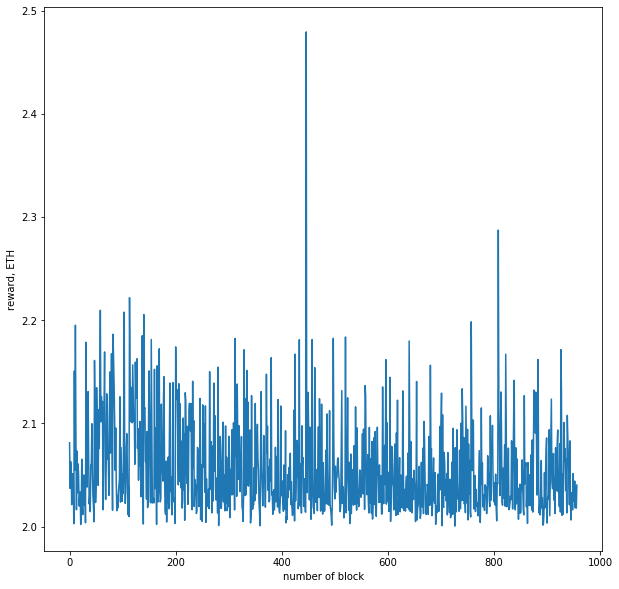

In [108]:
plt.figure(figsize=(10,10))
plt.plot(reward)
plt.ylabel('reward, ETH')
plt.xlabel('number of block')
plt.show()

In [0]:
procent = fee / reward *100

In [0]:
count = np.zeros(101)
for i in procent:
    for j in range(101):
        if(((j - 0.5) < i) & (i <= (j + 0.5))):
            count[j] +=1  

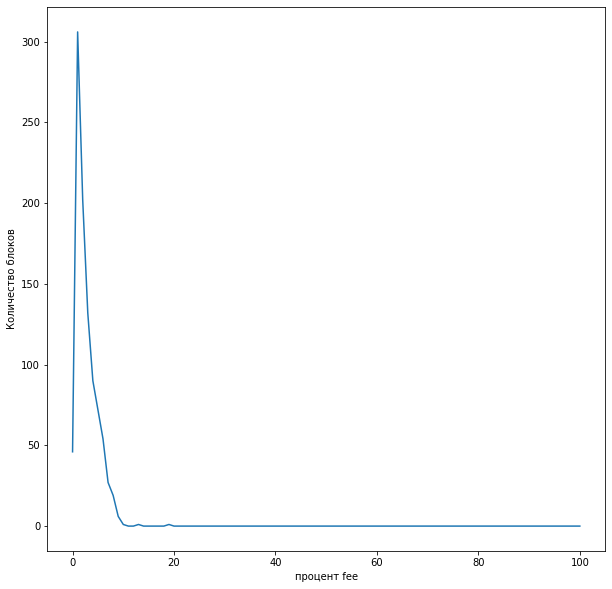

In [111]:
x = np.arange(101)
plt.figure(figsize=(10,10))
plt.plot(x, count)
plt.ylabel('Количество блоков')
plt.xlabel('процент fee')
plt.show()

In [0]:
mean = np.mean(fee)
median = np.median(fee)
scope = np.max(fee) - np.min(fee)
D = np.var(fee)
std = np.std(fee)

In [114]:
print('Математическое ожидание: {} \nМедиана: {} \nРазмах: {} \nДисперсия: {}\nCреднеквадратичное отклонение: {}'.format(mean, median, scope, D, std))

Математическое ожидание: 0.056239231164450745 
Медиана: 0.04311263096370001 
Размах: 0.4791833193607289 
Дисперсия: 0.002086467254889065
Cреднеквадратичное отклонение: 0.04567786394840574


# testing

In [0]:
count = np.ndarray((100,))

In [0]:
for i in range(7):
    check = gasUsed_file.readline() 
    print(check)
    if check == '[]\n':
        print('ошибочка')
        continue
    ren = check.split(', ')
    print(ren)
    ren[0] = ren[0][1:]
    ren[-1] = ren[-1][:-2]
    print(ren)
    ara = np.array(ren, dtype=int)
    print(ara)
    print('\n', '\n')


In [26]:
ren[0][1:]

'53401'

In [32]:
ren[-1][:-2]

'21000'

In [53]:
a = np.array([1, 2, 4])
b = np.array([2, 5, 6])
c = a*b
print(c)
print(c/10)

[ 2 10 24]
[0.2 1.  2.4]


In [78]:
 web3.eth.getTransaction('0xcf91315aa916442bde65c30a1af07e2b60b4cbeb10de0716a146f4d3598c7f21')

AttributeDict({'blockHash': HexBytes('0x39baafecba209d88482b818f8fb5348909ab89ff0a08ad7244bbf5cb196bce67'),
 'blockNumber': 9023039,
 'from': '0x0Ff669980eb268dF71c04a3Ee23cf199E92C5c13',
 'gas': 21000,
 'gasPrice': 50000000000,
 'hash': HexBytes('0xcf91315aa916442bde65c30a1af07e2b60b4cbeb10de0716a146f4d3598c7f21'),
 'input': '0x',
 'nonce': 0,
 'r': HexBytes('0x295fea9f23a1eb0fe150332cb8653e746edfe79552ec9da98cedff17e1d5e676'),
 's': HexBytes('0x63127b4db908df1e4a1bde60adf30336e44220b21dc26b0da1560b717e6b9c5c'),
 'to': '0xd995Ea9d81529Eb59EE31B609E8A2E772df8D527',
 'transactionIndex': 0,
 'v': 38,
 'value': 1162346260000000000})

In [79]:
web3.eth.getTransactionReceipt('0xcf91315aa916442bde65c30a1af07e2b60b4cbeb10de0716a146f4d3598c7f21')

AttributeDict({'blockHash': HexBytes('0x39baafecba209d88482b818f8fb5348909ab89ff0a08ad7244bbf5cb196bce67'),
 'blockNumber': 9023039,
 'contractAddress': None,
 'cumulativeGasUsed': 21000,
 'from': '0x0ff669980eb268df71c04a3ee23cf199e92c5c13',
 'gasUsed': 21000,
 'logs': [],
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 'status': 1,
 'to': '0xd995ea9d81529eb59ee31b609e8a2e772df8d527',
 'transactionHash': HexBytes('0xcf91315aa916442bde65c30a1af07e2b60b4cbeb10de0716a146f4d3598c7f21'),
 'transactionInd

In [0]:
gasused = 0
for i in current['transactions']:
    print(web3.eth.getTransaction(i)['gas'], web3.eth.getTransaction(i)['gasPrice'])
    tic = web3.eth.getTransactionReceipt(i)
    print(tic['gasUsed'], '\n')
    gasused += tic['gasUsed']
print(gasused)

In [0]:
print(first_block)
print(last_block)

8951400
8952400
